# Dataset

The "Netflix IMDB Scores" dataset contains 5283 films released between the years 1953 to 2022. It includes both movies and TV show that have been added to the collection of films curated by Netflix. It includes film details such as a short description, runtime, aggregate IMDb score, number of votes on IMDb, an content rating. Some entries contain missing data.


In [63]:
#import pandas
import pandas as pd

In [64]:
# Import the Netflix IMDb Scores dataset (CSV file)
# The file location
imdb_data_path = 'https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/raw/Netflix%20TV%20Shows%20and%20Movies.csv'

# Read in the file and print out the DataFrame
imdb_df = pd.read_csv(imdb_data_path)
imdb_df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


# 1.Data Cleaning

## 1.1 Get to know data

> #### Data description:

This dataset provides details on movies and TV shows, with IMDB ratings and vote counts as the unit of analysis. Each record contains attributes like title, release year, age certification, runtime, and a brief description. It also includes the unique IMDB ID, allowing for external reference, along with user ratings and votes from IMDB.

The data dictionary:

- 'index': Index row number in the dataframe
- 'id': Unique id of the movie/show
- 'title': The title of the movie/show
- 'type': Represents whether the recording is a movie or show on Netflix
- 'Description': Paragraph description of show/movie
- 'release_year': The year the movie/show was released
- 'age_certification': Appropriate Age Registriction/Recommendation of show/movie
- 'runtime': Length in minutes of movie/show. Shows are represented in average minutes per episode
- 'imdb_id': Id of movie/show on the Internet Movie Database
- 'imdb_score': Score given to movie/show on the Internet Movie Database
- 'imdb_votes': Number of imdb_score votes given by registered IMDB users

In [65]:
# find shape of the data
imdb_df.shape

(5283, 11)

In [66]:
# print columns labels
imdb_df.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [67]:
# check row labels
imdb_df.index

RangeIndex(start=0, stop=5283, step=1)

In [68]:
# find the column that is unique to each row (unit of observation)
(
    imdb_df['index'].unique().shape[0],
    imdb_df['id'].unique().shape[0],
    imdb_df['imdb_id'].unique().shape[0],
)

(5283, 5283, 5283)

In [69]:
# check type of variables
imdb_df.dtypes

,0
index,int64
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
imdb_id,object
imdb_score,float64


## 1.2 Identify which numerical columns and categorical columns

In [70]:
# create a list of the columns that are categorical and those that are integer and those that have string values

import numpy as np
numerical = []
categorical = []
string = []

# Title has been manually determined be of the "object" data type
categorical_type = {imdb_df['title'].dtype}


for column in imdb_df.columns:
# check if the column contains more than 10 unique values then it is not categorical
  if imdb_df[column].unique().shape[0] > 10 and imdb_df[column].dtype in categorical_type:
    string.append(column)
  elif imdb_df[column].dtype in categorical_type:
    categorical.append(column)
  else:
    numerical.append(column)

# otherwise it would be String values

print("Numerical columns: ", numerical)
print("Categorical columns: ", categorical)
print("String columns: ", string)

Numerical columns:  ['index', 'release_year', 'runtime', 'imdb_score', 'imdb_votes']
Categorical columns:  ['type']
String columns:  ['id', 'title', 'description', 'age_certification', 'imdb_id']


### 1.2.1 Categorical columns coding

In [71]:
# convert all the columns in the categorical list to be of the type category

for column in categorical:
  imdb_df[column] = imdb_df[column].astype('category')

imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              5283 non-null   int64   
 1   id                 5283 non-null   object  
 2   title              5283 non-null   object  
 3   type               5283 non-null   category
 4   description        5278 non-null   object  
 5   release_year       5283 non-null   int64   
 6   age_certification  2998 non-null   object  
 7   runtime            5283 non-null   int64   
 8   imdb_id            5283 non-null   object  
 9   imdb_score         5283 non-null   float64 
 10  imdb_votes         5267 non-null   float64 
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 418.1+ KB


## 1.3. Remove unnecessary values

### 1.3.1. Check for duplicate rows, remove them if needed

In [72]:
# check for duplicate rows using the duplicated().sum() functions - returns number of duplicate rows
imdb_df.duplicated().sum()

0

### 1.3.2. Removing unnecessary columns

We can reduce the size of our combined dataset by removing columns that are not important for our analyses. Columns can be "dropped" from a DataFrame using the DataFrame method `drop()`.

In [73]:
# Print out the column labels for the full dataset of artworks and artist info
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              5283 non-null   int64   
 1   id                 5283 non-null   object  
 2   title              5283 non-null   object  
 3   type               5283 non-null   category
 4   description        5278 non-null   object  
 5   release_year       5283 non-null   int64   
 6   age_certification  2998 non-null   object  
 7   runtime            5283 non-null   int64   
 8   imdb_id            5283 non-null   object  
 9   imdb_score         5283 non-null   float64 
 10  imdb_votes         5267 non-null   float64 
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 418.1+ KB


We have 3 ID columns: index, id, and imdb_id. It is sufficient to keep only 1 ID column to keep track of unique rows, so we will drop the index and id attribute.

In [74]:
# Remove specified column from the dataset using "drop()"
imdb_df = imdb_df.drop(columns=['index', 'id'])

# Print out the column labels from the new DataFrame
imdb_df.columns

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

More than 30% of the values in the **age_certification** are missing. However, we will choose to keep this column because we have another dataset that also contains film ratings. We expect that after merging the datasets on common columns, the data from the 2 columns will be enough to completely specify the content rating for the remaining films.

## 1.4. Handling missing data

The Netflix IMDb Scores dataset contains some missing values.

In [75]:
# check which columns have missing data with info()
imdb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              5283 non-null   object  
 1   type               5283 non-null   category
 2   description        5278 non-null   object  
 3   release_year       5283 non-null   int64   
 4   age_certification  2998 non-null   object  
 5   runtime            5283 non-null   int64   
 6   imdb_id            5283 non-null   object  
 7   imdb_score         5283 non-null   float64 
 8   imdb_votes         5267 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(4)
memory usage: 335.6+ KB


### 1.4.1. Consistency of missing values

The values in the columns can also differ in how they are represented, this includes NaN values.

For example in our dataset the `Date` column was used to create a more consitent `DateYear` column, but there is a difference in the length of each o f these columns.

One needs to understand and eliminate the source of this inconsitency to clean the data.

In [76]:
# Find rows with NaN in 'imdb_votes' and but supposedly has a value in 'imdb_score'
imdb_df[imdb_df['imdb_score'].notnull() & imdb_df['imdb_votes'].isnull()]

,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
918,Jackass Presents: Bad Grandpa .5,MOVIE,Bad Grandpa .5 gives you a whole new perspecti...,2014,PG-13,86,tt3766424,6.3,NaN
1111,Xenos,MOVIE,"In 2010, Abu Eyad and other young Palestinian ...",2013,NaN,12,tt3289618,7.8,NaN
2669,The Crossing,MOVIE,Three Palestinian siblings eagerly attempt to ...,2017,NaN,10,tt7466040,7.5,NaN
3468,A Cinderella Story: Christmas Wish,MOVIE,Kat is an aspiring singer-songwriter who dream...,2019,PG,93,tt10326928,5.3,NaN
3796,Jarhead: Law of Return,MOVIE,"Major Ronan Jackson, an accomplished fighter p...",2019,R,103,tt10767720,5.6,NaN
3946,Welcome to Sudden Death,MOVIE,Jesse Freeman is a former special forces offic...,2020,R,80,tt10804786,4.3,NaN
4020,The Lockdown Plan,MOVIE,NaN,2020,NaN,49,tt13079112,6.5,NaN
4257,Cops and Robbers,MOVIE,Animation and activism unite in this multimedi...,2020,PG-13,8,tt13322484,6.9,NaN
4328,In Vitro,MOVIE,'In Vitro' is an otherworldly rumination on me...,2019,NaN,27,tt10545994,7.7,NaN
4681,Audible,MOVIE,Football player Amaree McKenstry-Hall and his ...,2021,PG-13,39,tt12771540,5.3,NaN


There does not seem to be a pattern associated with the rows with missing `imdb_votes`. In a later step, we shall fill the missing entries with the median of the column.

In [77]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              5283 non-null   object  
 1   type               5283 non-null   category
 2   description        5278 non-null   object  
 3   release_year       5283 non-null   int64   
 4   age_certification  2998 non-null   object  
 5   runtime            5283 non-null   int64   
 6   imdb_id            5283 non-null   object  
 7   imdb_score         5283 non-null   float64 
 8   imdb_votes         5267 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(4)
memory usage: 335.6+ KB


### 1.4.2. Removing rows with missing data

In [78]:
# Identify rows with all NaN values
all_nan_rows = imdb_df[imdb_df.isnull().all(axis=1)]
all_nan_rows

,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes


In [79]:
# Create a new DataFrame containing only movies that include movie
# descriptions by removing rows that include "NaN" in the column "description"
# using the DataFrame method dropna() on subset of the column(s)
imdb_df = imdb_df.dropna(axis='rows', subset=['description'])

# Print out the resulting DataFrame
imdb_df

,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...
5278,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [80]:
# remove all entries where Artist name is null using filtering with notna()
imdb_df = imdb_df[imdb_df['description'].notna()]

### 1.4.3. Replacing missing data

In cases removing the rows is not an option replace the values by default standard which can be either mean in numerical values or any domain dependent value.

In [81]:
# The dataset contains missing values in height and width column
# replace them with mean value and dropna method
# method 1: df.dropna({col: value}, inplace=True),
# df[column].fillna(newvalue, inplace=True)
imdb_df['imdb_votes'] = imdb_df['imdb_votes'].fillna(imdb_df['imdb_votes'].median(skipna=True))

# Convert data type of the column into an integer data type
imdb_df['imdb_votes'] = imdb_df['imdb_votes'].astype(int)

# check dataset for sanity
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5278 entries, 0 to 5282
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              5278 non-null   object  
 1   type               5278 non-null   category
 2   description        5278 non-null   object  
 3   release_year       5278 non-null   int64   
 4   age_certification  2996 non-null   object  
 5   runtime            5278 non-null   int64   
 6   imdb_id            5278 non-null   object  
 7   imdb_score         5278 non-null   float64 
 8   imdb_votes         5278 non-null   int64   
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 376.4+ KB


## 1.5 Dealing with outliers

### 1.5.1. Summary Statistics

In [82]:
# get summary statistics of the numerical columns
imdb_df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5278.000000,5278.000000,5278.000000,5.278000e+03
mean,2015.878363,79.210117,6.534236,2.336487e+04
std,7.348958,38.928918,1.160390,8.704835e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.220000e+02
50%,2018.000000,87.000000,6.600000,2.281000e+03
75%,2020.000000,106.000000,7.400000,1.012750e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


### Plotting data to identify outliers

### 1.5.2. The pandas plot method

The previous notebooks had examples of using histograms and box plots for outlier detection, here we explore scatter plots. Use what is convenient. Some statistical processes require historgram or box plot based outlier detection. (e.g. when distribution shape is important)

<Axes: xlabel='imdb_votes', ylabel='imdb_score'>

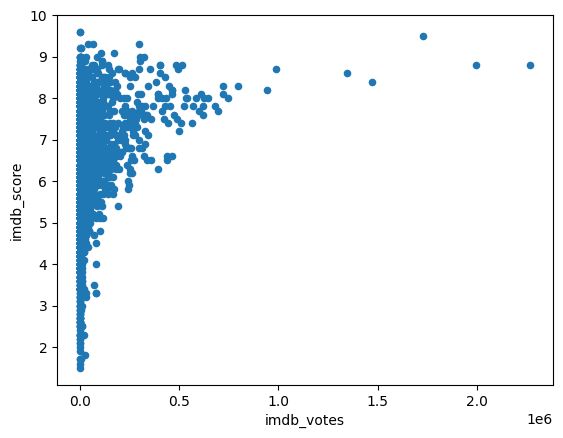

In [83]:
# Call the plot() method on the entire paintings DataFrame
imdb_df.plot.scatter(x= 'imdb_votes', y = 'imdb_score')

In [84]:
imdb_df[imdb_df['imdb_votes'] > 0.8e6]

,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
101,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,tt0109830,8.8,1994599
104,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,tt0120815,8.6,1346020
229,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694
230,The Walking Dead,SHOW,Sheriff's deputy Rick Grimes awakens from a co...,2010,TV-MA,46,tt1520211,8.2,945125
246,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,tt1375666,8.8,2268288
662,Django Unchained,MOVIE,"With the help of a German bounty hunter, a fre...",2012,R,165,tt1853728,8.4,1472668
1145,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,52,tt4575572,8.7,989090


The outliers in the dataset are very popular movies. Stranger Things is an especially popular Netflix title. The values do not seem unreasonable, and we have no reason to believe that entries with more votes would hurt our analysis.

### 1.5.3. Saving a plot

`matplotlib` provides functionality for saving a figure as an image using the method `savefig()`. We need to get the figure from our plot by calling `get_figure` on the matplotlib `Axes` object and then calling the method `savefig()`.

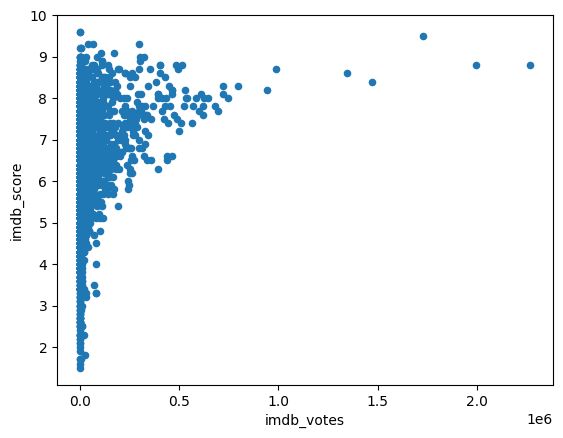

In [85]:
# Save the IMDb scores vs IMDb votes plot as a png
imdb_df.plot.scatter(x= 'imdb_votes', y = 'imdb_score')

import matplotlib.pyplot as plt
figure_name = 'imdb_score_votes'

plt.savefig(f'{figure_name}.png')

# Save a high resolution version of the plot by setting a high dpi
plt.savefig(f'{figure_name}.png', dpi=1000)

# Save a vectorized version of the plot (svg)
plt.savefig(f'{figure_name}.svg')

#### Seaborn

Seaborn is a "Matplotlib-based high-level interface for drawing statistical graphics." Seaborn builds upon the functionality of matplotlib and provides more robust options. You can learn more and find documentation on the [seaborn website](https://seaborn.pydata.org/)

In [86]:
# Import the Seaborn library as sns (callable in our code as sns)
import seaborn as sns

We will use the seaborn `scatterplot()` method to generate the same scatter plot we created earlier of the width and height of smaller paintings, but this time will use seaborn's easy functionality fo encoding data into the color of the scatter plot points.

With most seaborn plotting methods we pass in keyword arguments to specify the data source (`data=small_paintings`) and the specific encodings of the data in the plot, in our case the horizontal axis variable (`x='Width (cm)'`), the vertical axis variable (`y='Height (cm)'`), and the variable represented by color (`hue='AspectString'`).

<Axes: xlabel='imdb_votes', ylabel='imdb_score'>

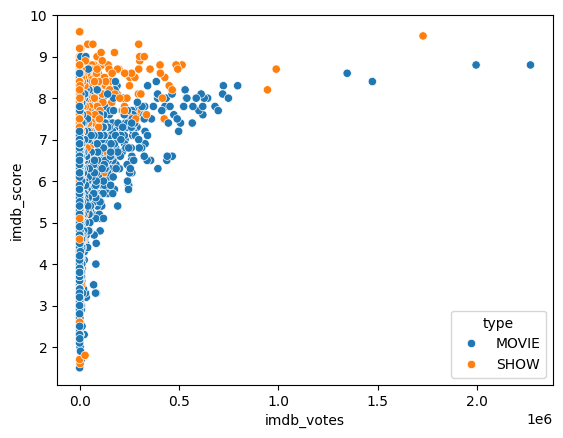

In [87]:
# Create a seaborn scatter plot, plotting "Width (cm)" on the
# horizontal axis and "Height (cm)" on the vertical axis and using
# "AspectString" to define the color of each point
sns.scatterplot(data=imdb_df, x='imdb_votes', y='imdb_score', hue='type')

## 1.6. Data Wrangling

### 1.6.1. Replacing values in a column

We can replace values in a column by first accessing that column and using the Series method `replace()` (*remember accessing one column from a DataFrame returns a pandas Series*). The `replace()` method can accept a dictionary of items in which the dictionary keys are the values to be replaced and the dictionary values are the new values to be inserted.

We will demonstrate this method by replacing the values `Y` and `N` in the `Cataloged` column to the more explicit values `Yes` and `No`, respectively. Also, we will edit the DataFrame directly by including the keyword argument `inplace=True`.

In [88]:
# print the columns and the number of values and datatypes for reference
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5278 entries, 0 to 5282
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              5278 non-null   object  
 1   type               5278 non-null   category
 2   description        5278 non-null   object  
 3   release_year       5278 non-null   int64   
 4   age_certification  2996 non-null   object  
 5   runtime            5278 non-null   int64   
 6   imdb_id            5278 non-null   object  
 7   imdb_score         5278 non-null   float64 
 8   imdb_votes         5278 non-null   int64   
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 376.4+ KB


In [89]:
# Print the unique values contained in the "Cataloged" column using the
# DataFrame method unique()
imdb_df["type"].unique()

['MOVIE', 'SHOW']
Categories (2, object): ['MOVIE', 'SHOW']

### 1.6.2. Filtering rows in a DataFrame

Identifying films that were released in the year 2022 which is the final year described in the dataset


In [90]:
# Filter the final DataFrame to only return rows of artworks by Pablo Picasso
imdb_df[imdb_df["release_year"] == 2022]

,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
4414,Anatomy of a Scandal,SHOW,A sexual consent scandal amongst British privi...,2022,TV-MA,45,tt12748084,7.0,16425
4415,Heartstopper,SHOW,Teens Charlie and Nick discover their unlikely...,2022,TV-14,28,tt10638036,8.9,28978
4416,The Pentaverate,SHOW,"After influencing global events for centuries,...",2022,TV-MA,27,tt10203880,6.1,3409
4417,Inventing Anna,SHOW,A journalist with a lot to prove investigates ...,2022,TV-MA,68,tt8740976,6.8,54105
4418,The Adam Project,MOVIE,"After accidentally crash-landing in 2022, time...",2022,PG-13,106,tt2463208,6.7,156603
...,...,...,...,...,...,...,...,...,...
5187,Latte and the Magic Waterstone,MOVIE,When a greedy bear steals a magic stone to kee...,2022,NaN,89,tt9038290,5.6,938
5189,Whindersson Nunes: My Own Show!,MOVIE,Comedian Whindersson Nunes brings his quirky i...,2022,NaN,63,tt17887288,7.1,186
5198,Team Zenko Go,SHOW,Every good deed is one for this team of kids. ...,2022,TV-Y,20,tt18274176,7.2,21
5200,The Big Shot Game Show,SHOW,Brazilian entrepreneurs pitch their ideas to a...,2022,NaN,49,tt17052496,6.2,24


Identifying MOVIES that were released in the year 2022 which is the final year described in the dataset

In [91]:
# Filter the final DataFrame to only return rows of movies released in 2022
imdb_df[(imdb_df["release_year"] == 2022) & (imdb_df['type'] == 'MOVIE')]

,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
4418,The Adam Project,MOVIE,"After accidentally crash-landing in 2022, time...",2022,PG-13,106,tt2463208,6.7,156603
4419,Operation Mincemeat,MOVIE,"In 1943, two British intelligence officers con...",2022,PG-13,128,tt1879016,6.9,1972
4422,Choose or Die,MOVIE,"In pursuit of an unclaimed $125,000 prize, a b...",2022,NaN,85,tt11514780,4.7,14911
4423,Metal Lords,MOVIE,"For teenage misfits Hunter and Kevin, the path...",2022,R,97,tt12141112,6.7,19689
4425,The Bubble,MOVIE,A group of actors and actresses stuck inside a...,2022,R,126,tt13610562,4.7,20080
...,...,...,...,...,...,...,...,...,...
5102,Cat Burglar,MOVIE,"In this edgy, over-the-top, interactive trivia...",2022,PG-13,12,tt17321170,6.9,2281
5163,Into the Wind,MOVIE,She graduated from a prestigious high school i...,2022,NaN,108,tt17044594,5.2,749
5174,Mo Gilligan: There's Mo to Life,MOVIE,Mo Gilligan breaks down his days as a broke te...,2022,NaN,65,tt17162494,5.9,215
5187,Latte and the Magic Waterstone,MOVIE,When a greedy bear steals a magic stone to kee...,2022,NaN,89,tt9038290,5.6,938


## 1.7. Export the Cleaned Dataset

In [92]:
imdb_df.to_csv('netflix_imdb_scores.csv', index=False)

# Credits

This notebook contains contributions from Anthony Brown and Nikhil Vasudeva. It is adapted from a notebook provided as a workshop for CSC 442 at NC State University

The workshop was created by Aditi Mallavarapu, Claire Cahoon and Walt Gurley, adapted from previous workshop materials by Scott Bailey and Simon Wiles, of Stanford Libraries.